# Exploratory Data Analysis(EDA) on customer shopping behavior

## Project description

I will be conducting EDA on customer shopping behavior using a dataset that contains information about customers transcation, including demographics, purchase details, payment method and purchasing pattern.
The goal is to uncover insights that will help buisnesses gain a deeper understanding on what factor influence customer purchasing decision and identify key trends in customer behavior.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Read in the data

df =pd.read_csv('shopping_trends_updated.csv')

In [3]:
# Display the first 10 rows

df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [4]:
# Display the number of rows and columns
df.shape

(3900, 18)

In [5]:
# Display basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
# Display descriptive statistics of the numeric columns

df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Data Cleaning

In [7]:
# Count missing values in each column

df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

No missing values in the dataset

In [8]:
# Check for duplicate records

df.duplicated().sum()

0

No duplicate rows in the dataset

## Data Analysis & Visualization

What is the  distribution of customer age?

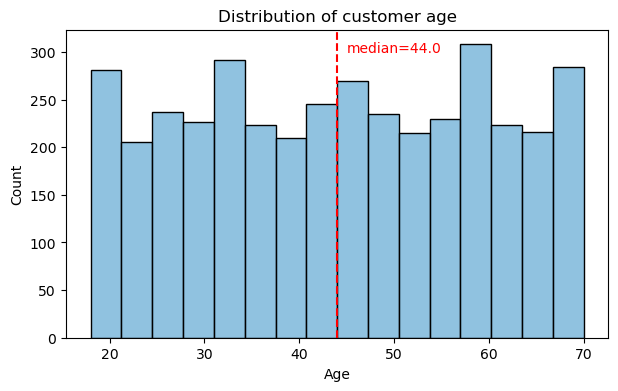

In [9]:
# Plot the histogram
plt.figure(figsize=(7, 4))
sns.histplot(x=df['Age'], color = '#6BAED6')

# Calculate the median age
median = df['Age'].median()

# Add median line and text
plt.axvline(median, color='red', linestyle='--')
plt.text(45,300, 'median=44.0', color='red')

# Add title
plt.title('Distribution of customer age');

How does purchase amount vary by age group?

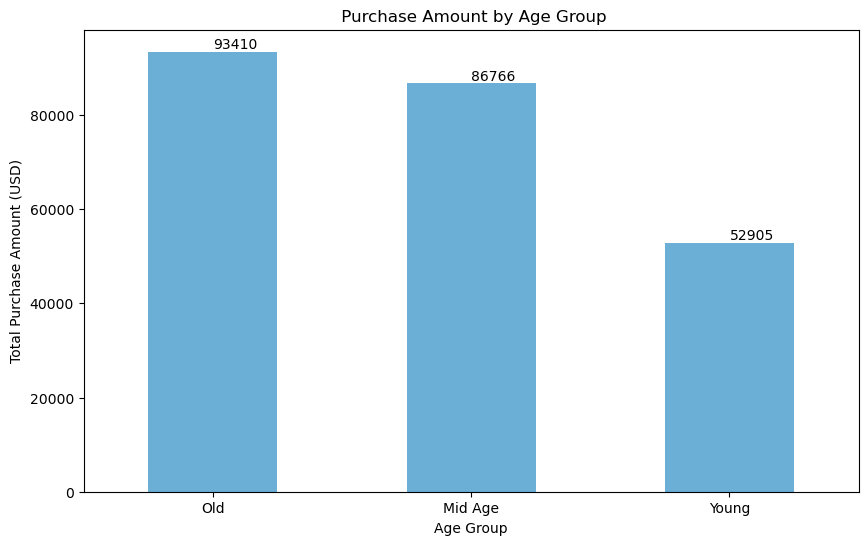

In [10]:
# Define the age groups
def age_group(age):
    if 18 <= age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Mid Age'
    elif 50 <= age <= 70:
        return 'Old'
    
# Apply the age grouping function to create a new column and sort from highest to lowest
df['Age Group'] = df['Age'].apply(age_group)

# Calculate the total purchase amount by age group
total_purchase_by_age_group = df.groupby('Age Group')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bar = total_purchase_by_age_group.plot(kind='bar', color= '#6BAED6')

# Add  labels on top of each bar to display the exact total purchase amount
for p in bar.patches:
    plt.annotate(int(p.get_height()), 
                 (p.get_x() + 0.25, p.get_height() + 1), 
                  va='bottom', 
                  color='black')
    
# Add titles and labels
plt.title(' Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount (USD)')


plt.xticks(rotation=0)

# Show the chart
plt.show()

What is the gender distribution among customer?

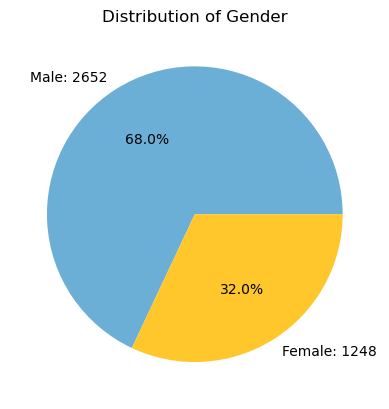

In [11]:
# Get the count of each gender in the dataset
data = df['Gender'].value_counts()

# Plot a pie chart for gender distribution
plt.pie(data, 
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%',
        colors =['#6BAED6','#FFC72C'])

# Add the title 
plt.title('Distribution of Gender')

# Show the pie chart
plt.show()

Which item are most frequently purchased?

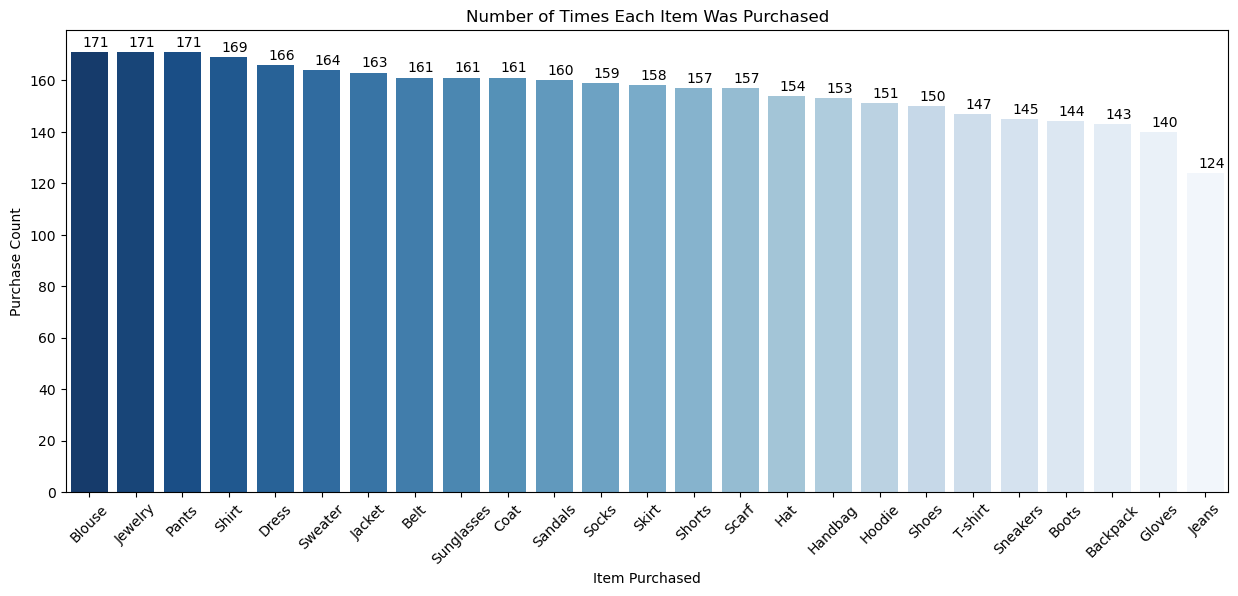

In [12]:
# Create a count plot showing how many times each item was purchased
plt.figure(figsize=(15, 6))
bar = sns.countplot(x='Item Purchased', 
                    data=df, 
                    order=df['Item Purchased'].value_counts().index,
                    palette='Blues_r' )

# Add labels on top of each bar to display the exact count
for p in bar.patches:
    bar.annotate(int(p.get_height()), 
                 (p.get_x() + 0.25,
                  p.get_height() + 1), 
                  va='bottom', 
                  color='black')

# Add title to explain what the plot represents
plt.title('Number of Times Each Item Was Purchased')

# Label the x-axis
plt.xlabel('Item Purchased')

# Label the y-axis to indicate the count
plt.ylabel('Purchase Count')

# Rotate x-axis labels for readability, especially if there are many items
plt.xticks(rotation=45)

# Show the chart
plt.show()

Which season has the highest total purchase amount?

In [13]:
# Sum the purchase amounts for each season
seasonal_sales = df.groupby('Season')['Purchase Amount (USD)'].sum() 

# Display the total purchase amounts by season
print('seasonal_sales:')
print(seasonal_sales)

seasonal_sales:
Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64


What is the distribution of purchase amount by season?

Text(0.5, 1.0, 'Purchase Amount Distribution by Season')

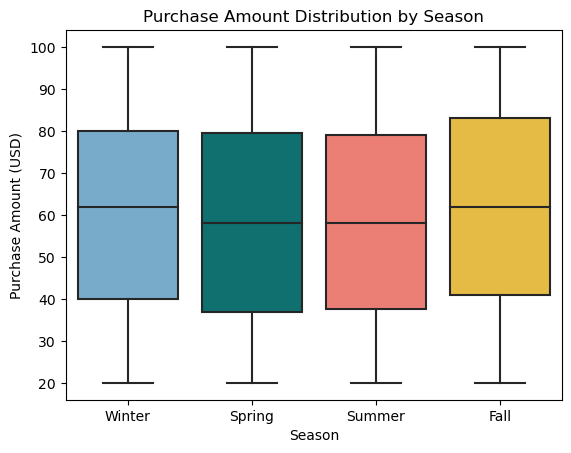

In [14]:
# Create a color palette
colors = ['#6BAED6', '#008080', '#FF6F61', '#FFC72C']

# List the seasons in the order I want them to appear in the plot
seasons_order =['Winter', 'Spring', 'Summer', 'Fall']

# Create a boxplot 
g= sns.boxplot(data = df,
               x = 'Season',
               y = 'Purchase Amount (USD)', 
               order = seasons_order,
               palette = colors, 
               showfliers= False);

# Add a title
g.set_title('Purchase Amount Distribution by Season')


What is the total purchase amount for each category across different seasons?

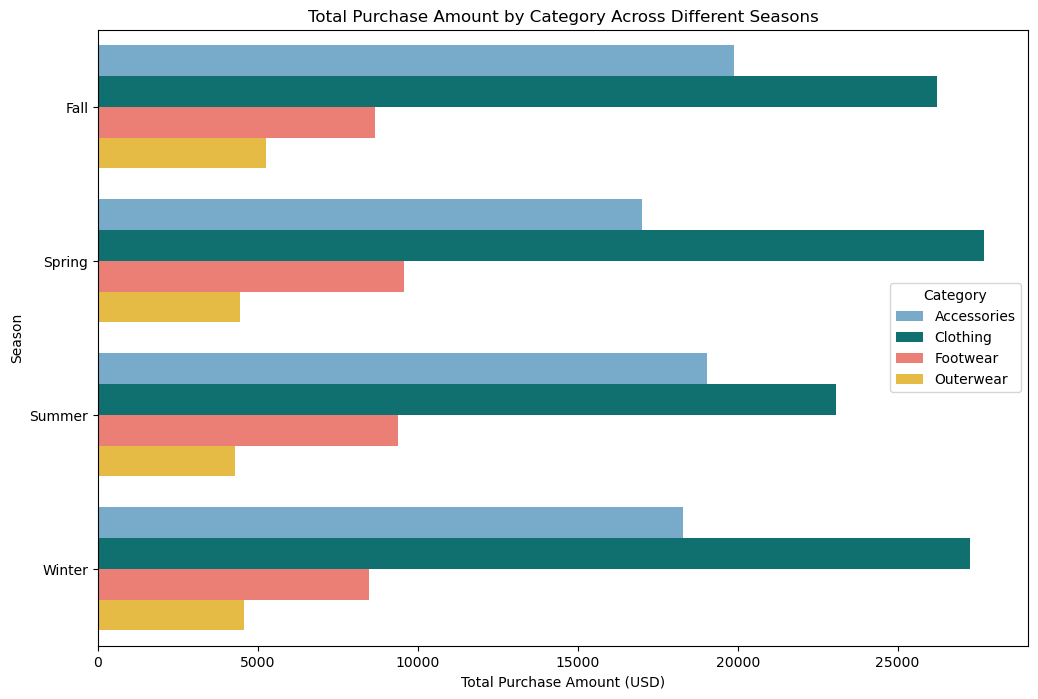

In [15]:
# Create a color palette
colors = ['#6BAED6', '#008080', '#FF6F61', '#FFC72C']

# Group the data by Season and Category, and calculate the total Purchase Amount for each group
category_season_total = df.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Create a bar plot 
plt.figure(figsize=(12, 8))
sns.barplot(data=category_season_total,
            x= 'Purchase Amount (USD)', 
            y='Season', hue='Category', 
            palette = colors)

# Add title and labels
plt.title('Total Purchase Amount by Category Across Different Seasons')
plt.xlabel('Total Purchase Amount (USD)')
plt.ylabel('Season')

# Display the plot
plt.show()

What is the total purchase amount for each location?

In [16]:
# Group the data by Location and calculate the total purchase amount for each location
total_purchase_by_location = df.groupby('Location')['Purchase Amount (USD)'].sum()

# Display the total purchase amounts for each location
print('Total Purchase by Location:')
print(total_purchase_by_location)

Total Purchase by Location:
Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee         47

Which locations have the highest total purchase amounts?

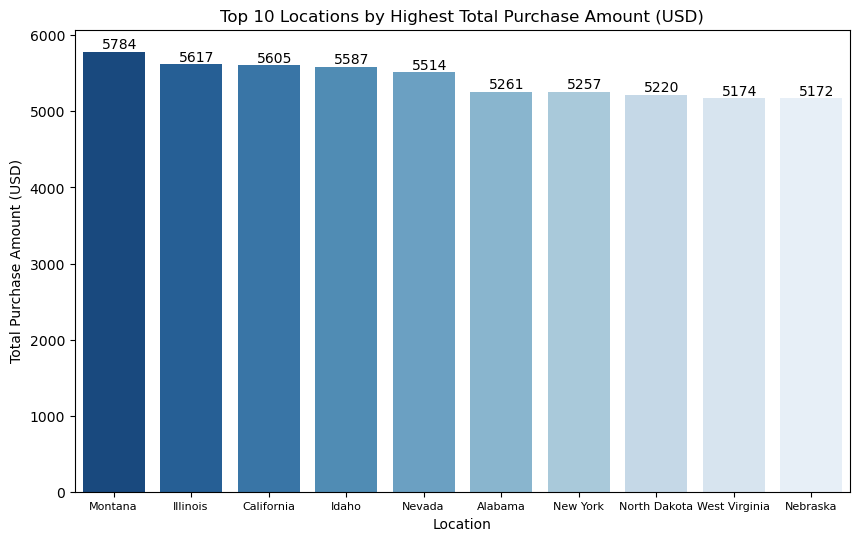

In [17]:
# calculate the total purchase amount for each location
location_purchase_sum = df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()
top_10_locations = location_purchase_sum.sort_values(by='Purchase Amount (USD)', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Location',
                       y='Purchase Amount (USD)',
                       data=top_10_locations,
                       palette='Blues_r')

# Add labels on top of each bar showing the exact purchase amount
for p in bar_plot.patches:
    bar_plot.annotate(int(p.get_height()),
                      (p.get_x() + 0.25,
                       p.get_height() + 1), 
                      va='bottom',
                      color='black') 

# Add a title and labels     
plt.title('Top 10 Locations by Highest Total Purchase Amount (USD)')
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation = 0, ha = 'center', fontsize = 8)

#show the plot
plt.show()

What is the total number for each size of clothing items (XL, L, M, S)?

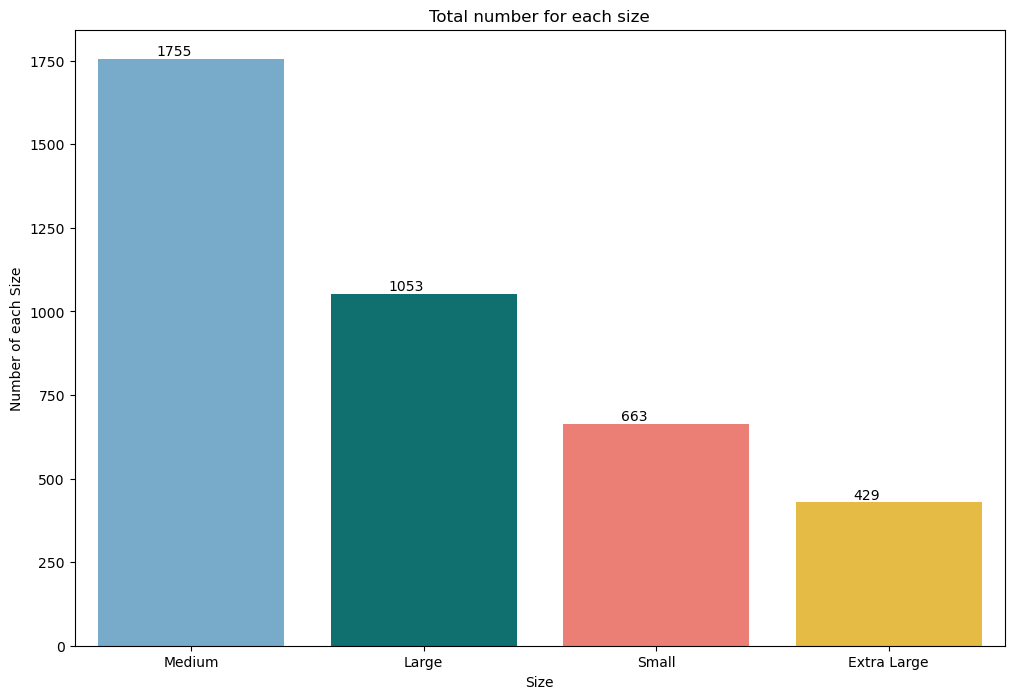

In [18]:
# Create a color palette
colors = ['#6BAED6', '#008080', '#FF6F61', '#FFC72C'] 

# Create a count plot
plt.figure(figsize=(12, 8)) 
plot = sns.countplot(x="Size",
                     data=df,
                     order = df['Size'].value_counts().index,
                     palette=colors) 

# Add labels on top of each bar showing the exact count values
for p in plot.patches:
    plot.annotate(int(p.get_height()),
                  (p.get_x() + 0.25,
                   p.get_height() + 1), 
                  va='bottom', 
                  color='black')

# Add title and labels 
plt.title('Total number for each size')
plt.xlabel('Size')
plt.ylabel('Number of each Size')

# Make the x-tick labels  more descriptive
plot.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

# Show the plot
plt.show()

What is total number for each color of items?

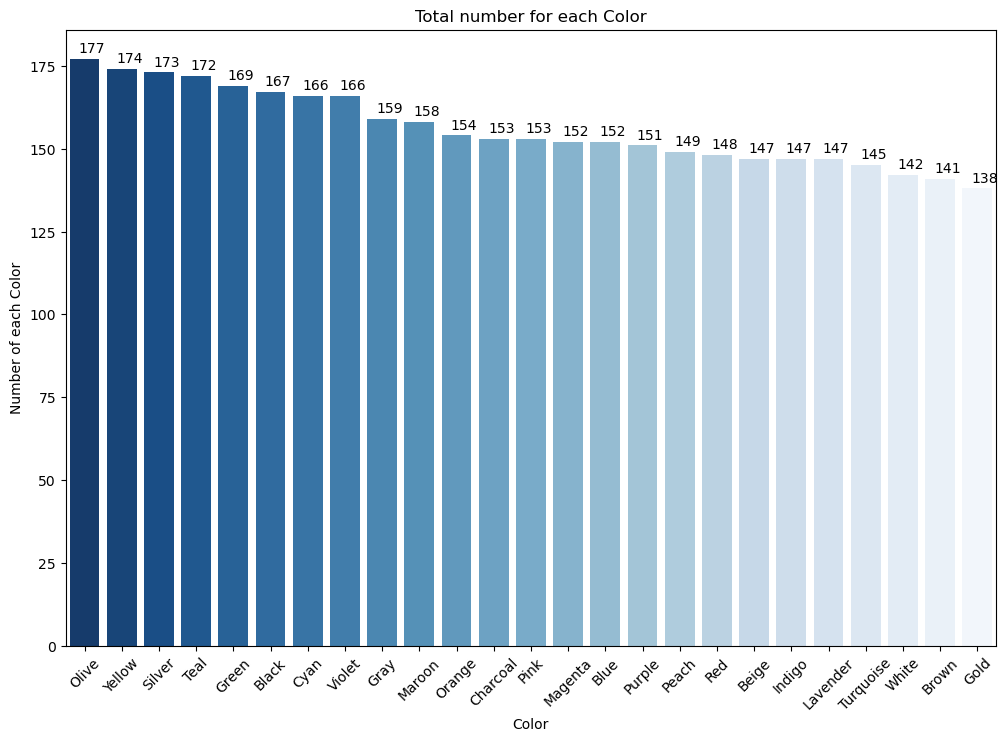

In [19]:
# Create a count plot
plt.figure(figsize=(12, 8)) 
plot = sns.countplot(x="Color", 
                     data=df,
                     order = df['Color'].value_counts().index, 
                     palette='Blues_r' ) 

# Add labels on top of each bar showing the exact count values
for p in plot.patches:
    plot.annotate(int(p.get_height()), 
                  (p.get_x() + 0.25, 
                   p.get_height() + 1),
                  va='bottom', color='black')

# Add title and labels    
plt.title('Total number for each Color')
plt.xlabel('Color')
plt.ylabel('Number of each Color')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45) 

# Show the plot
plt.show()

What are the different purchase frequencies among customers, and what is the total number?

In [20]:
# Count the occurrences of each unique value in the 'Frequency of Purchases' column
# and sort the results from highest to lowest

df['Frequency of Purchases'].value_counts().sort_values(ascending=False)

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

How does subscription status relate to purchase frequency?

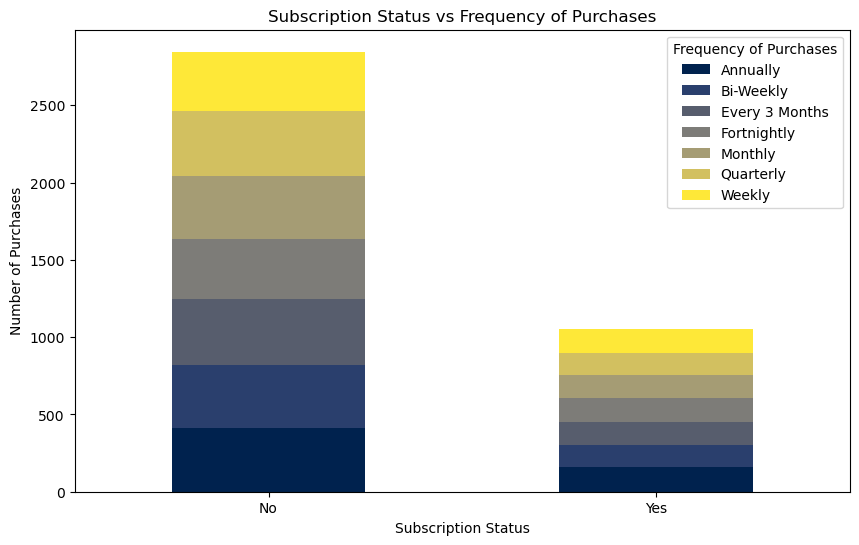

In [21]:
# Create a crosstab to summarize the relationship between Subscription Status and Frequency of Purchases
crosstab_data = pd.crosstab(df['Subscription Status'], df['Frequency of Purchases'])

# Plot a stacked bar chart to visualize the crosstab data
crosstab_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='cividis')

# Add title and labels
plt.title('Subscription Status vs Frequency of Purchases')
plt.xlabel('Subscription Status')
plt.ylabel('Number of Purchases')

# Set x-tick labels to be horizontal
plt.xticks(rotation=0)

# Add a legend to clarify which colors represent which frequency of purchases
plt.legend(title='Frequency of Purchases')

# Show the plot
plt.show()          

What is the distribution of review ratings?

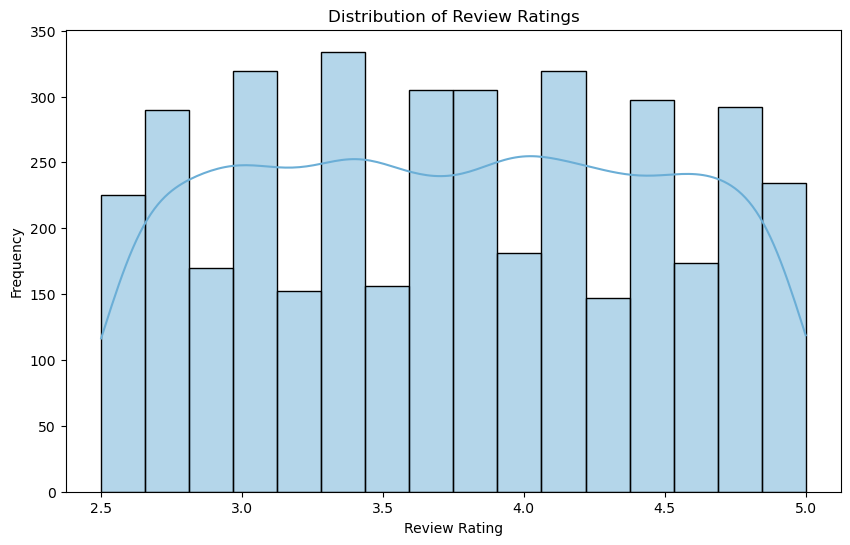

In [22]:
# plot a histogram 
plt.figure(figsize=(10, 6))
sns.histplot(df['Review Rating'],color = '#6BAED6', kde=True)

# Add title and labels
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()


Which shipping methods are preferred by customers?

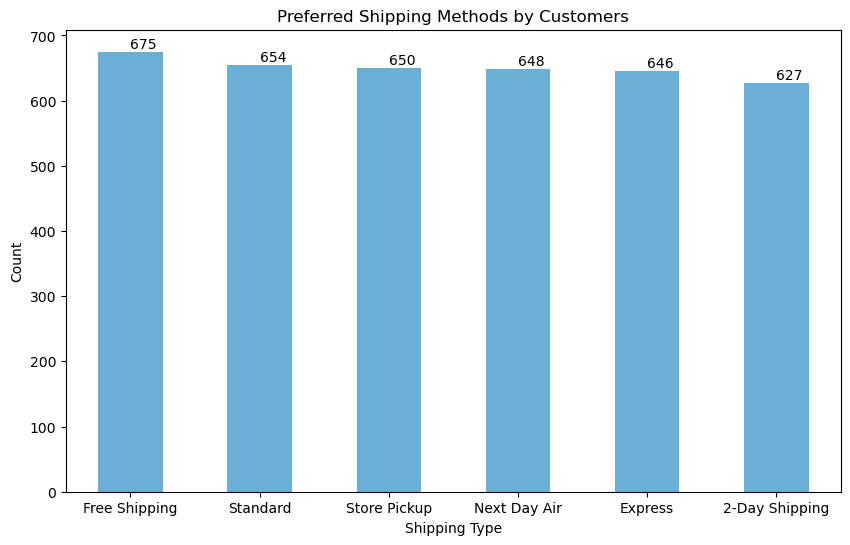

In [23]:
# Count how many times each shipping method is used in the dataset
shipping_count = df['Shipping Type'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
bar = shipping_count.plot(kind='bar', color = '#6BAED6')

# Add labels on top of each bar showing the exact count values
for p in bar.patches:
    plt.annotate(int(p.get_height()),
                 (p.get_x() + 0.25,
                  p.get_height() + 1),
                 va='bottom',
                 color='black')

# Add title and labels
plt.title('Preferred Shipping Methods by Customers')
plt.xlabel('Shipping Type')
plt.ylabel('Count')

# Set x-tick labels to be horizontal
plt.xticks(rotation =0)

# Show the plot
plt.show()


What are the preferred payment methods among customers?

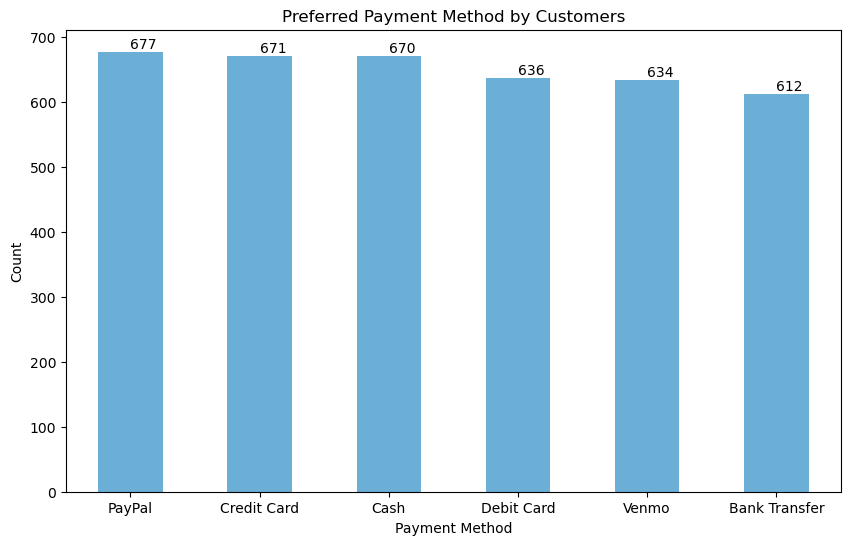

In [24]:
# Count how many times each shipping method is used in the dataset
payment_count = df['Payment Method'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
bar = payment_count.plot(kind='bar',color ='#6BAED6')

# Add labels on top of each bar showing the exact count values
for p in bar.patches:
    plt.annotate(int(p.get_height()), 
                 (p.get_x() + 0.25,
                  p.get_height() + 1),
                 va='bottom', 
                 color='black')
    
# Add title and labels
plt.title('Preferred Payment Method by Customers')
plt.xlabel('Payment Method')
plt.ylabel('Count')

# Set x-tick labels to be horizontal
plt.xticks(rotation =0)

# Show the plot
plt.show()

How do discounts influence the average purchase amounts made by customers?

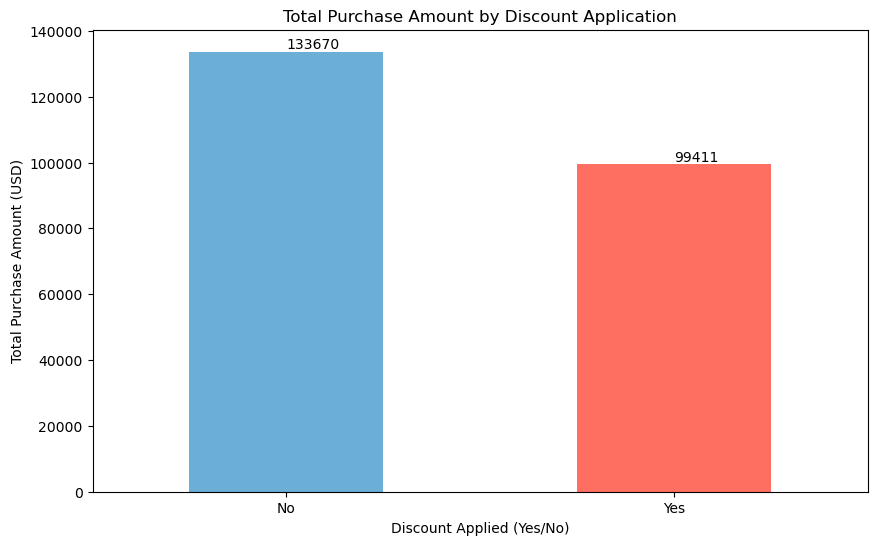

In [25]:
# Calculate the total purchase amount based on whether a discount was applied or not
total_purchase = df.groupby('Discount Applied')['Purchase Amount (USD)'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
bar =total_purchase.plot(kind='bar', color=['#6BAED6', '#FF6F61'])

# Add labels on top of each bar showing the actual total  purchase amount
for p in bar.patches:
    plt.annotate(int(p.get_height()), 
                 (p.get_x() + 0.25, 
                  p.get_height() + 1), 
                 va='bottom',
                 color='black')

# Add title and labels
plt.title('Total Purchase Amount by Discount Application')
plt.xlabel('Discount Applied (Yes/No)')
plt.ylabel('Total Purchase Amount (USD)')

# Set x-tick labels to be horizontal
plt.xticks(rotation=0)

# Show the plot
plt.show()

How do promocode influence the average purchase amounts made by customers?

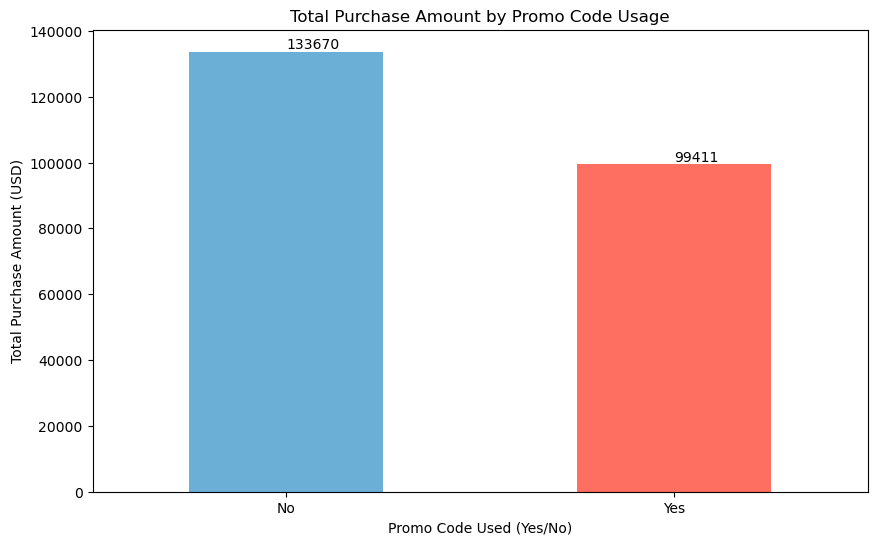

In [26]:
# Group the data by whether a promo code was used and calculate the total purchase amount
total_purchase_promo = df.groupby('Promo Code Used')['Purchase Amount (USD)'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
bar= total_purchase_promo.plot(kind='bar', color=['#6BAED6', '#FF6F61'])

# Add labels on top of each bar showing the actual total  purchase amount
for p in bar.patches:
    plt.annotate(int(p.get_height()),
                 (p.get_x() + 0.25, 
                  p.get_height() + 1), 
                 va='bottom',
                 color='black')

# Add title and labels
plt.title('Total Purchase Amount by Promo Code Usage')
plt.xlabel('Promo Code Used (Yes/No)')
plt.ylabel('Total Purchase Amount (USD)')

# Set x-tick labels to be horizontal
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [28]:
# Filter for customers who used both discount and promo code
filtered_yes_discount_promo = df[(df['Discount Applied'] == 'Yes') & (df['Promo Code Used'] == 'Yes')]
filtered_yes_discount_promo 

# Count the number of customers who used both
count_yes_discount_promo = filtered_yes_discount_promo.shape[0]  
count_yes_discount_promo

1677

In [29]:
# Filter for customers who did not use discount and did not use promo code
filtered_no_promo_discount = df[(df['Discount Applied'] == 'No') & (df['Promo Code Used'] == 'No')]

filtered_no_promo_discount

# Count the number of customers who did not use either
count_no_discount_promo = filtered_no_promo_discount.shape[0]
count_no_discount_promo

2223

This shows that all customers who used a discount also used promo code. It seems that customers are often presented with both discounts and promo codes, which are likely complementary; they cannot use one without the other. This could be a deliberate marketing strategy.

##  Hypotesis testing

**Hypothesis Test :** Does applying discount have a significant impact on the average purchase amount compared to when no discount is applied

Null Hypothesis(Ho): The mean purchase amount for customers who applied discount is equal to the mean purchase amount for those who did not.

Ho : average_discount_applied = average_discount_not_applied


Alternative Hypothesis(H1): The mean purchase amount for customers who applied discount is different from the mean purchase amount for those who did not.

H1 : average_discount_applied ≠ average_discount_not_applied

In [33]:
# purchase amounts for customers who applied a discount
discount_applied = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)']

# purchase amounts for customers who did not apply a discount
discount_not_applied = df[df['Discount Applied'] == 'No']['Purchase Amount (USD)']

# Calculate the mean purchase amount for customers who applied a discount
mean_discount_applied = discount_applied.mean()

# Calculate the mean purchase amount for customers who did not apply a discount
mean_discount_not_applied = discount_not_applied.mean()

# Print the average purchase amounts for both groups
print(f"Mean Purchase Amount (Discount Applied): ${mean_discount_applied:.2f}")
print(f"Mean Purchase Amount (Discount Not Applied): ${mean_discount_not_applied:.2f}")

# Conduct a two sample t-test to compare means
t_stat, p_value = stats.ttest_ind(discount_applied, discount_not_applied, equal_var=False)

# Print the t-stat and p-value
print(f'T-stat: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Set the significance level for hypothesis testing
alpha = 0.05  

# Determine whether to reject the null hypothesis based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average purchase amount.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average purchase amount.")

Mean Purchase Amount (Discount Applied): $59.28
Mean Purchase Amount (Discount Not Applied): $60.13
T-stat: -1.1122
P-value: 0.2661
Fail to reject the null hypothesis: There is no significant difference in the average purchase amount.


Since the p-value is 0.2661(greater than the significance level 0.05), we fail to reject the null hypothesis.
The small difference in average spending ($59 vs. $60) is not statistically significant. 
In conclusion, whether customers use a discount or not does not lead to a difference in how much they spend.

## Insights & Conclusion  

- The age distribution of customers ranges from 18 to 70 years old, with a fairly uniform distribution across different ages. There is a slight increase in the number of customers in their late 60s and early 70s, which shows that older customers have the highest total purchase amount at $93,410.

- There are more male customers, 2,652 which is 68.0%, compared to female customers, 1,248 which is 32.0%. This suggests that the products or services offered appeal more to male customers. It also highlights an opportunity for businesses to focus on increasing engagement with female customers.

- Blouses, jewelry, and pants are the three most popular items purchased. This suggests that customers prefer both clothing and accessories. Clothing generates the highest sales across all seasons, especially in fall and spring, making it the leading category overall, followed by accessories. On the other hand, footwear and outerwear have lower sales amounts. This indicates a steady demand for apparel and accessories, highlighting an important area for businesses to concentrate their efforts on

- Montana, Illinois, and California are the locations with the highest purchase amounts. By focusing on these key states, the business could optimize its sales efforts and improve customer engagement in these areas.

- Non-subscribers purchase more frequently than subscribers across various periods. This could be attributed to limited interaction or a lack of recognized benefits from subscriptions. This finding suggests that businesses need to investigate why subscribers may not be engaging as often. They might consider strategies to convert these customers into subscribers or enhance the value of subscription plans to encourage more regular purchases.

- The most popular shipping method is Free Shipping,This shows  how effective free shipping promotions are in improving customer satisfaction and driving sales, with Standard Shipping and Store Pickup as the next preferred options. Customers generally prefer shipping methods that are both affordable and convenient.

- PayPal and credit cards are the most preferred payment methods among customers. This illustrates the importance of supporting these payment options to ensure a seamless transaction experience. Cash payments follow, indicating a preference for traditional methods.